In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import pyplot
from scipy.stats import norm
import datetime as dt

In [3]:
Loans_df = pd.read_csv("Task4_Loan_Data.csv")
Loans_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [4]:
Loans_df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [5]:
d = {range(800,851):1,range(750,800):2,range(700,750):3,
     range(650,700):4,range(600,650):5,range(300,600):6 }
d

{range(800, 851): 1,
 range(750, 800): 2,
 range(700, 750): 3,
 range(650, 700): 4,
 range(600, 650): 5,
 range(300, 600): 6}

In [8]:
Loans_df['Rating'] = Loans_df['fico_score'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))
Loans_df.groupby('fico_score')['default']
Loans_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,Rating
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,5
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,6
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,5
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,5
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,5
...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,4
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,5
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,6
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,5


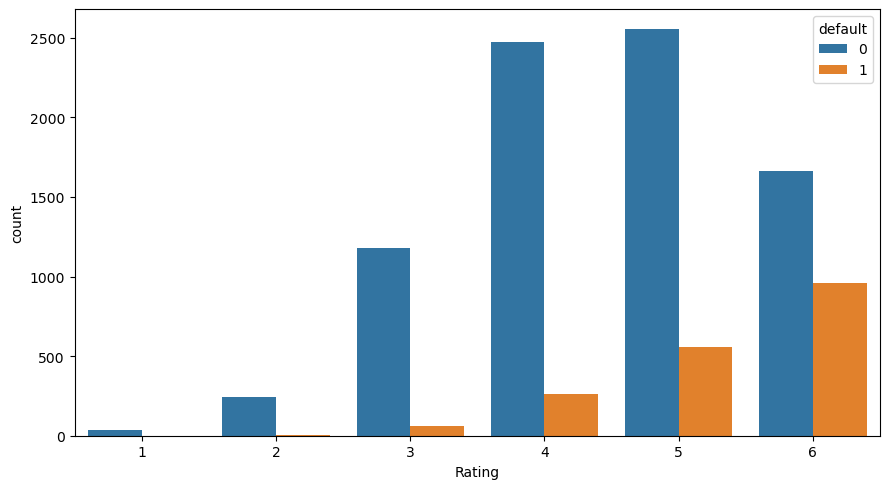

In [9]:
plt.figure(figsize=(9,5))
sns.countplot(x=Loans_df['Rating'],hue=Loans_df['default'])
plt.tight_layout()

In [11]:
Loans_df.groupby('Rating')['default'].value_counts().sort_values()
Loans_df['ratio_income_Totdebt'] = Loans_df['income']/Loans_df['total_debt_outstanding']
Loans_df['ratio_income_loan_amt'] = Loans_df['income']/Loans_df['loan_amt_outstanding']
Loans_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,Rating,ratio_income_Totdebt,ratio_income_loan_amt
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,5,19.931033,14.945650
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,6,3.238454,13.603576
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,5,32.481364,19.585647
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,5,29.722181,15.599407
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,5,13.256433,17.422978
...,...,...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,4,16.717341,14.072707
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,5,14.651358,19.287238
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,6,7.935166,12.367199
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,5,48.825030,15.485222


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, roc_auc_score

In [14]:
X = Loans_df.drop(['default','fico_score','customer_id'], axis=1)
Y = Loans_df['default']
id_users = Loans_df['customer_id']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.7, random_state=123)
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(Y_train))

/Users/tm/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
lr_preds = clf_logistic.predict_proba(X_test)
lr_preds_df = pd.DataFrame(lr_preds[:,1][0:], columns = ['lr_pred_PD'])
true_df = Y_test
print(pd.concat([true_df.reset_index(drop = True), lr_preds_df], axis = 1))

      default    lr_pred_PD
0           0  2.044314e-01
1           0  9.962397e-09
2           0  1.449882e-12
3           0  3.161332e-07
4           0  1.325709e-06
...       ...           ...
6995        1  5.090250e-01
6996        0  1.285733e-09
6997        0  1.531032e-13
6998        0  7.604588e-11
6999        0  1.332437e-08

[7000 rows x 2 columns]


In [16]:
lr_preds_df['lr_pred_loan_status_60'] = lr_preds_df['lr_pred_PD'].apply(lambda x: 1 if x > 0.60 else 0)
print("Non-Default / Default predictions at 60% Threshhold: ")
print(lr_preds_df['lr_pred_loan_status_60'].value_counts())

Non-Default / Default predictions at 60% Threshhold: 
lr_pred_loan_status_60
0    5766
1    1234
Name: count, dtype: int64


In [17]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix at 60% Threshhold: ")
print(confusion_matrix(Y_test, lr_preds_df['lr_pred_loan_status_60']))

Confusion Matrix at 60% Threshhold: 
[[5716    7]
 [  50 1227]]


In [19]:
from sklearn.metrics import classification_report
target_names = ['Non-Default', 'Default']
print(classification_report(Y_test, lr_preds_df['lr_pred_loan_status_60'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.99      1.00      1.00      5723
     Default       0.99      0.96      0.98      1277

    accuracy                           0.99      7000
   macro avg       0.99      0.98      0.99      7000
weighted avg       0.99      0.99      0.99      7000



In [20]:
print(clf_logistic.score(X_test, Y_test))

0.9934285714285714


In [21]:
Prob_to_default = clf_logistic.predict_proba(X)
prob_data = pd.DataFrame(Prob_to_default[:,1][0:].round(decimals = 2), columns = ['Probability _to_Default'])
prob_data

,Probability _to_Default
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
9995,0.0
9996,0.0
9997,0.0
9998,0.0


In [22]:
X = pd.concat([id_users,X,Y, prob_data], axis = 1)
X

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,Rating,ratio_income_Totdebt,ratio_income_loan_amt,default,Probability _to_Default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,5,19.931033,14.945650,0,0.0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,6,3.238454,13.603576,1,1.0
2,2256073,0,3363.009259,2027.830850,65866.71246,4,5,32.481364,19.585647,0,0.0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,5,29.722181,15.599407,0,0.0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,5,13.256433,17.422978,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,4,16.717341,14.072707,0,0.0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,5,14.651358,19.287238,0,0.0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,6,7.935166,12.367199,0,0.0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,5,48.825030,15.485222,0,0.0


In [23]:
X = Loans_df['Rating'].to_numpy().reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.7, random_state=123)
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(Y_train))
lr_preds = clf_logistic.predict_proba(X_test)
lr_preds_df = pd.DataFrame(lr_preds[:,1][0:], columns = ['lr_pred_PD'])
true_df = Y_test
print(pd.concat([true_df.reset_index(drop = True), lr_preds_df], axis = 1))

      default  lr_pred_PD
0           0    0.372445
1           0    0.372445
2           0    0.092889
3           0    0.092889
4           0    0.017362
...       ...         ...
6995        1    0.197768
6996        0    0.092889
6997        0    0.197768
6998        0    0.092889
6999        0    0.197768

[7000 rows x 2 columns]


In [24]:
Prob_to_default = clf_logistic.predict_proba(X)
prob_data = pd.DataFrame(Prob_to_default[:,1][0:].round(decimals = 2), columns = ['Probability _to_Default'])
X = pd.concat([Loans_df, prob_data], axis = 1)
X

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,Rating,ratio_income_Totdebt,ratio_income_loan_amt,Probability _to_Default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,5,19.931033,14.945650,0.20
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,6,3.238454,13.603576,0.37
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,5,32.481364,19.585647,0.20
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,5,29.722181,15.599407,0.20
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,5,13.256433,17.422978,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,4,16.717341,14.072707,0.09
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,5,14.651358,19.287238,0.20
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,6,7.935166,12.367199,0.37
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,5,48.825030,15.485222,0.20
